In [1]:
#Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Reading the Excel file with World Development Indicators(WDI)
data_path =  #(read data from excel file:World_Development_Indicators.xlsx)
WDI = pd.read_excel(data_path)

print(WDI.info())
print(WDI['Series Name'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  30 non-null     object 
 1   Country Code  30 non-null     object 
 2   Series Name   30 non-null     object 
 3   Series Code   30 non-null     object 
 4   2016          30 non-null     object 
 5   2017          30 non-null     object 
 6   2018          30 non-null     object 
 7   2019          30 non-null     float64
 8   2020          30 non-null     object 
 9   2021          30 non-null     object 
 10  2022          30 non-null     object 
dtypes: float64(1), object(10)
memory usage: 2.7+ KB
None
['Unemployment, total (% of total labor force) (national estimate)'
 'Total greenhouse gas emissions (kt of CO2 equivalent)'
 'Inflation, GDP deflator (annual %)' 'GDP growth (annual %)'
 'Current health expenditure (% of GDP)']


In [4]:
# Reading the covid 19 data
data_path = #(read data from excel file:covid_19_data.xlsx)
covid_19_data = pd.read_excel(data_path)

print(covid_19_data.columns)

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million'],
      dtype='object')


In [ ]:
#Calculating row-wise means ignoring NaN values,# Applied the row-wise mean function to the specified rows and columns
# Load the Excel file while replacing '..' with NaN directly during the loading process
na_values = {'..': np.nan}
WDI = pd.read_excel(data_path, na_values=na_values)

# Acolumns_of_interest
columns_of_interest = [2016,2017,2018,2019,2020,2021,2022]

# Convert the columns of interest to numeric values (beacause its a mixture of objects & float)
WDI[columns_of_interest] = WDI[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Define a function to calculate row-wise means ignoring NaN values
def row_wise_mean(row):
    row_mean = row.mean(skipna=True)
    return row.fillna(row_mean)

# Apply the row-wise mean function to the specified rows and columns
WDI.loc[:29, columns_of_interest] = WDI.loc[:29, columns_of_interest].apply(row_wise_mean, axis=1)

# Display the resulting DataFrame with the row-wise mean
print(WDI)


In [31]:
# Grouping the columns by 'Series Name' and calculating mean
grouped_columns = WDI.groupby('Series Name').agg({
    2016: 'mean',
    2017: 'mean',
    2018: 'mean',
    2019: 'mean',
    2020: 'mean',
    2021: 'mean',
    2022: 'mean'
}).reset_index()  # Resetting the index to get a DataFrame

# Displaying the resulting grouped columns
print(grouped_columns)
#print(grouped_columns.describe())

grouped_columns_df = grouped_columns.copy()

                                         Series Name          2016  \
0              Current health expenditure (% of GDP)  7.083645e+00   
1                              GDP growth (annual %)  4.208711e+00   
2                 Inflation, GDP deflator (annual %)  3.153140e+00   
3  Total greenhouse gas emissions (kt of CO2 equi...  3.598289e+06   
4  Unemployment, total (% of total labor force) (...  7.885600e+00   

           2017          2018          2019          2020          2021  \
0  6.849824e+00  6.817244e+00  6.998201e+00  7.716283e+00  7.093039e+00   
1  4.254190e+00  4.488195e+00  3.136955e+00 -2.749566e+00  7.436690e+00   
2  4.338660e+00  3.588503e+00  2.362210e+00  2.342653e+00  6.199814e+00   
3  3.651914e+06  3.799717e+06  3.813902e+06  3.715808e+06  3.715926e+06   
4  7.929933e+00  8.189306e+00  8.163500e+00  9.075167e+00  9.323667e+00   

           2022  
0  7.093039e+00  
1  3.761404e+00  
2  6.222596e+00  
3  3.715926e+06  
4  8.388167e+00  


In [9]:
# Extracting year from the 'date' column
covid_19_data['year'] = covid_19_data['date'].dt.year

# Filtering the data for the years 2020, 2021, 2022, and 2023
years_of_interest = [2020, 2021, 2022,]
filtered_data = covid_19_data[covid_19_data['year'].isin(years_of_interest)]

# Creating data for years 2016 to 2019 with new cases set as 0
data_2016_to_2019 = {
    'year': [2016, 2017, 2018, 2019],
    'new_cases': [0, 0, 0, 0]
}

# Creating a DataFrame for years 2016 to 2019
additional_data = pd.DataFrame(data_2016_to_2019)

# Appending the additional data to the existing 'filtered_data'
filtered_data = pd.concat([filtered_data, additional_data])

# Grouping the updated data by 'year' and summing 'new_cases' across all countries
cases_per_year = filtered_data.groupby('year')['new_cases'].sum().reset_index()

# Displaying the updated DataFrame with percentages
print(cases_per_year)
print(cases_per_year.columns)
cases_per_year_df = cases_per_year.copy()

   year    new_cases
0  2016          0.0
1  2017          0.0
2  2018          0.0
3  2019          0.0
4  2020   31134918.0
5  2021   61388422.0
6  2022  143084965.0
Index(['year', 'new_cases'], dtype='object')


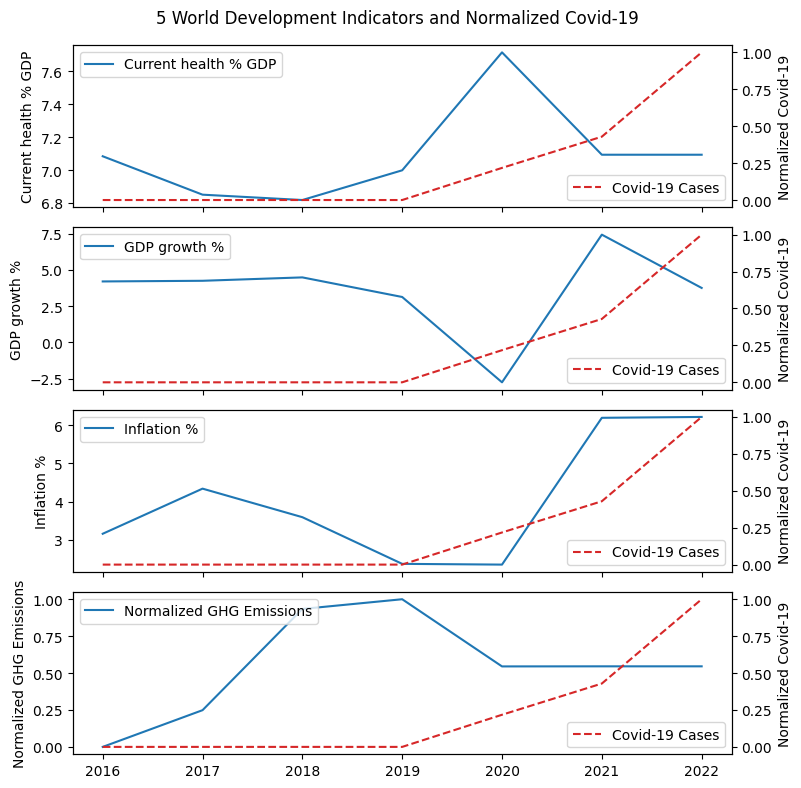

In [33]:
# Splitting the data for health, GDP, Inflation, and Unemployment
health_data = grouped_columns[grouped_columns['Series Name'] == 'Current health expenditure (% of GDP)'].drop(columns='Series Name').transpose().reset_index()
gdp_data = grouped_columns[grouped_columns['Series Name'] == 'GDP growth (annual %)'].drop(columns='Series Name').transpose().reset_index()
inflation_data = grouped_columns[grouped_columns['Series Name'] == 'Inflation, GDP deflator (annual %)'].drop(columns='Series Name').transpose().reset_index()

unemployment_data = grouped_columns[grouped_columns['Series Name'] == 'Unemployment, total (% of total labor force) (modeled ILO estimate)']
if not unemployment_data.empty:
    unemployment_data = unemployment_data[['2016', '2017', '2018', '2019', '2020', '2021', '2022']]
    unemployment_data.columns = ['Year', 'Unemployment %']

# Check if 'unemployment_data' is not empty before renaming columns
if not unemployment_data.empty:
    unemployment_data.columns = ['Year', 'Unemployment %']

# Renaming the columns
health_data.columns = ['Year', 'Current health % GDP']
gdp_data.columns = ['Year', 'GDP growth %']
inflation_data.columns = ['Year', 'Inflation %']

# Combining the split data into a dictionary
data1 = {
    'Year': health_data['Year'],
    'Current health % GDP': health_data['Current health % GDP'],
    'GDP growth %': gdp_data['GDP growth %'],
    'Inflation %': inflation_data['Inflation %']
}
# Include 'Unemployment %' if it is not empty
if not unemployment_data.empty:
    data1['Unemployment %'] = unemployment_data['Unemployment %']

# Splitting the data for greenhouse gas emissions
emissions_data = grouped_columns[grouped_columns['Series Name'] == 'Total greenhouse gas emissions (kt of CO2 equivalent)'].drop(columns='Series Name').transpose().reset_index()
emissions_data.columns = ['Year', 'Total greenhouse gas emissions (kt of CO2 equivalent)']

# Creating the 'data3' for greenhouse gas emissions
data3 = {
    'Year': emissions_data['Year'],
    'Total greenhouse gas emissions (kt of CO2 equivalent)': emissions_data['Total greenhouse gas emissions (kt of CO2 equivalent)']
}

# Second data
data2 = cases_per_year_df

# Convert data to dataframes
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# Normalize values to fit on the same scale
normalized_new_cases = (df2['new_cases'] - df2['new_cases'].min()) / (df2['new_cases'].max() - df2['new_cases'].min())
normalized_emissions = (df3['Total greenhouse gas emissions (kt of CO2 equivalent)'] - df3['Total greenhouse gas emissions (kt of CO2 equivalent)'].min()) / (df3['Total greenhouse gas emissions (kt of CO2 equivalent)'].max() - df3['Total greenhouse gas emissions (kt of CO2 equivalent)'].min())

# Get the columns from df1 except 'Year'
columns_df1 = [col for col in df1.columns if col != 'Year']

# Create separate graphs for each column
fig, axs = plt.subplots(len(columns_df1) + 1, 1, figsize=(8, 2 * (len(columns_df1) + 1)), sharex=True)
fig.suptitle('5 World Development Indicators and Normalized Covid-19')

# Plotting the columns in df1
for i, col in enumerate(columns_df1):
    ax1 = axs[i]
    ax2 = ax1.twinx()
    ax1.plot(df1['Year'], df1[col], label=col)
    ax2.plot(df2['year'], normalized_new_cases, color='tab:red', linestyle='--', label='Covid-19 Cases')
    ax1.set_ylabel(col)
    ax2.set_ylabel('Normalized Covid-19')
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')

# Plotting normalized_emissions and normalized_new_cases together in one graph
ax1 = axs[len(columns_df1)]  # Using the last axis for the second set of plots
ax2 = ax1.twinx()
ax1.plot(df3['Year'], normalized_emissions, color='tab:blue', linestyle='-', label='Normalized GHG Emissions')
ax2.plot(df2['year'], normalized_new_cases, color='tab:red', linestyle='--', label='Covid-19 Cases')
ax1.set_ylabel('Normalized GHG Emissions')
ax2.set_ylabel('Normalized Covid-19')
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.xlabel('Year')
plt.tight_layout()
plt.show()


In [29]:
#Data Intergration
grouped_columns = pd.DataFrame(grouped_columns_df)

# Convert the columns from 2016 to 2022 to a single 'year' column
melted_df = grouped_columns.melt(id_vars='Series Name', var_name='year', value_name='value')

# Sort the DataFrame by 'Series Name' and 'year'
melted_df = melted_df.sort_values(by=['Series Name', 'year']).reset_index(drop=True)

# Convert the 'year' column to datetime and then extract the year as an integer
melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y').dt.year

# Assuming cases_per_year_df also has a 'year' column and is previously defined
cases_per_year_df['year'] = pd.to_datetime(cases_per_year_df['year'], format='%Y').dt.year

# Get the common years between both DataFrames
common_years = cases_per_year_df['year'].tolist()
filtered_melted_df = melted_df[melted_df['year'].isin(common_years)]

# Merge the DataFrames on the 'year' column
merged_df = pd.merge(filtered_melted_df, cases_per_year_df, on='year')

# Assign the merged DataFrame to new_df
new_df = merged_df

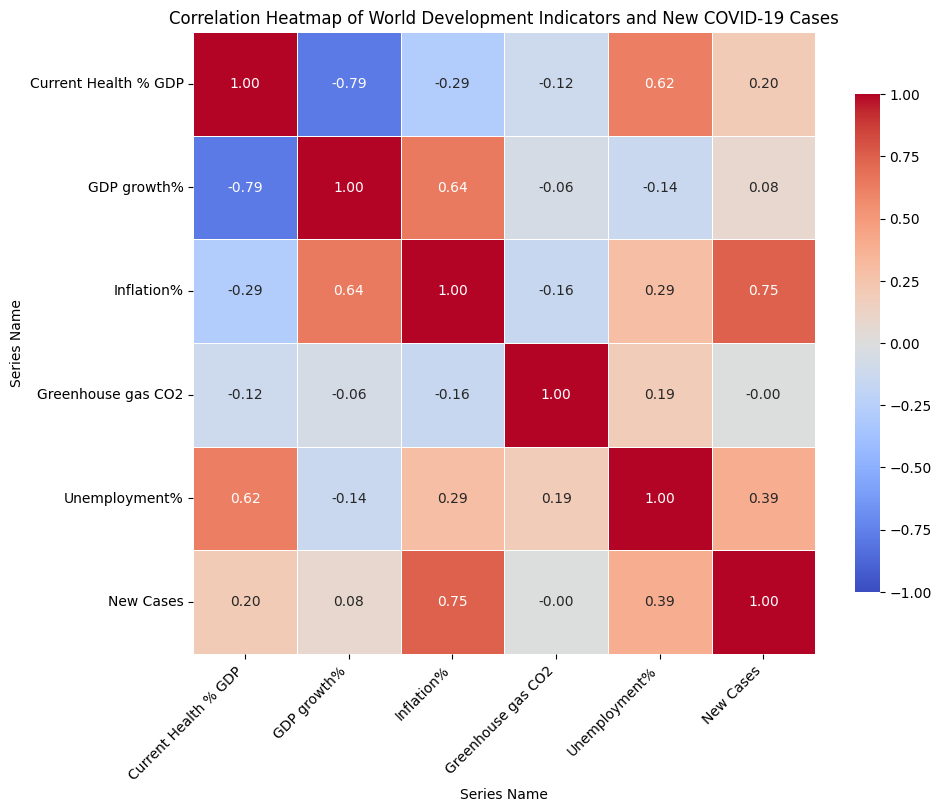

In [34]:
#Correlaton Heat Map

# Pivot the DataFrame to wide format with years as rows and series names as columns
pivot_df = new_df.pivot(index='year', columns='Series Name', values='value')

# Assuming 'new_cases' is a yearly value, we can add it directly to the pivoted DataFrame
pivot_df['new_cases'] = new_df.groupby('year')['new_cases'].first()

# Calculate the correlation matrix for the wide DataFrame
correlation_matrix = pivot_df.corr()

plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap as needed

# Create a heatmap with a diverging color map and improved visualization
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=.5,
    vmin=-1, vmax=1,  # Set the range of the color map from -1 to 1 for better visualization of correlations
    cbar_kws={'shrink': 0.8},  # Adjust color bar size
)

# Customize x-axis and y-axis labels
xtick_labels = ['Current Health % GDP', 'GDP growth%', 'Inflation%', 'Greenhouse gas CO2', 'Unemployment%', 'New Cases']
ytick_labels = ['Current Health % GDP', 'GDP growth%', 'Inflation%', 'Greenhouse gas CO2', 'Unemployment%', 'New Cases']

# Set x-axis labels with proper alignment and rotation
heatmap.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Set y-axis labels with proper alignment
heatmap.set_yticklabels(ytick_labels, rotation=0, va='center')

plt.tight_layout()  # Adjust the layout to fit everything

# Set a title for the heatmap
plt.title('Correlation Heatmap of World Development Indicators and New COVID-19 Cases')

# Show the heatmap
plt.show()


In [32]:
import pandas as pd
from scipy import stats

# Your development indicators data structured in a DataFrame using grouped_columns
development_data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022],
}

# Loop through each row in grouped_columns and add the mean values to development_data
for index, row in grouped_columns.iterrows():
    development_data[row['Series Name']] = [row[2016], row[2017], row[2018], row[2019], row[2020], row[2021], row[2022]]

# Convert data to DataFrame
df = pd.DataFrame(development_data)
df = df.rename(columns={'kt of CO2 equivalent': 'Total greenhouse gas emissions (kt of CO2 equivalent)',
                        'Unemployment (% of total labor force)': 'Unemployment %'})


# Separate the dataset into pre-COVID and during-COVID
pre_covid = df[df['Year'] <= 2019].drop('Year', axis=1)
during_covid = df[df['Year'] >= 2020].drop('Year', axis=1)

# Conduct a two-sample t-test for each indicator
results = {}
for column in pre_covid.columns:
    stat, p_val = stats.ttest_ind(pre_covid[column], during_covid[column], equal_var=False)  # Assuming unequal variances
    results[column] = p_val

# Fixed alpha value
alpha = 0.1

# Interpret the results
significant_results = {}
print("Indicator | p-value | Significant at alpha = 0.1")
print("-------------------------------------------------")
for k, v in results.items():
    is_significant = "Yes" if v < alpha else "No"
    print(f"{k:30} | {v:.5f} | {is_significant}")
    if v < alpha:
        significant_results[k] = v

# Check if significant_results is empty
if not significant_results:
    print("\nThere was no significant impact of COVID-19 on the five development indicators", alpha)
else:
    print("\nThere was a significant impact of COVID-19 on at least one of the five development indicators", alpha)
    for indicator in significant_results:
        print(indicator)

Indicator | p-value | Significant at alpha = 0.1
-------------------------------------------------
Current health expenditure (% of GDP) | 0.21615 | No
GDP growth (annual %)          | 0.72536 | No
Inflation, GDP deflator (annual %) | 0.35027 | No
Total greenhouse gas emissions (kt of CO2 equivalent) | 0.99906 | No
Unemployment, total (% of total labor force) (national estimate) | 0.07714 | Yes

There was a significant impact of COVID-19 on at least one of the five development indicators 0.1
Unemployment, total (% of total labor force) (national estimate)
